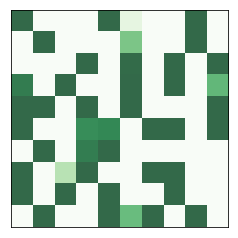

In [10]:
%matplotlib inline
from quake import Earthquake
from Cell2D import Cell2DViewer

from matplotlib import rc
rc('animation', html='html5')

steve = Earthquake(10, fth=2)
viewer = Cell2DViewer(steve)
anim = viewer.animate(frames=100,interval=100)

In [11]:
anim

In [1]:
%matplotlib inline
from plot_quake import * 
from quake import Earthquake

In [ ]:
%time calculate_power_law(iters=100000,plot=True, n=35, fth=1.5)

INFO: Elasticity coefficient: 0.2


INFO: Elasticity coefficient: 0.05
INFO: Elasticity coefficient: 0.0605263157895
INFO: Elasticity coefficient: 0.0710526315789
INFO: Elasticity coefficient: 0.0815789473684
INFO: Elasticity coefficient: 0.0921052631579
INFO: Elasticity coefficient: 0.102631578947
INFO: Elasticity coefficient: 0.113157894737
INFO: Elasticity coefficient: 0.123684210526
INFO: Elasticity coefficient: 0.134210526316
INFO: Elasticity coefficient: 0.144736842105
INFO: Elasticity coefficient: 0.155263157895
INFO: Elasticity coefficient: 0.165789473684
INFO: Elasticity coefficient: 0.176315789474
INFO: Elasticity coefficient: 0.186842105263
INFO: Elasticity coefficient: 0.197368421053
INFO: Elasticity coefficient: 0.207894736842
INFO: Elasticity coefficient: 0.218421052632
INFO: Elasticity coefficient: 0.228947368421
INFO: Elasticity coefficient: 0.239473684211
INFO: Elasticity coefficient: 0.25


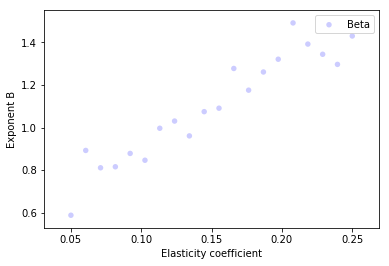

In [7]:
plot_power_law(n=35, iters=1000, fth=2)

nan

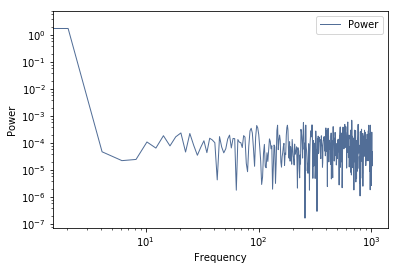

In [2]:
plot_frequency(iters=1000, plot=True, n=100)

[ 10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90  95
 100]
[ 10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90  95
 100] [9, 151, 267, 378, 602, 796, 1081, 1356, 1700, 1990, 2379, 2824, 3256, 3805, 4316, 4942, 5501, 6093, 6844]


2.4080183453201109

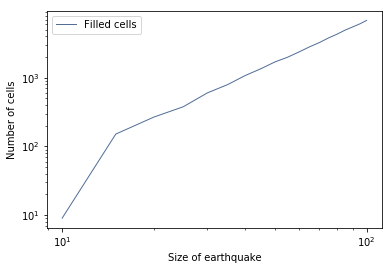

In [3]:
find_fractals(iters=10,plot=True)